In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

In [2]:
df = pd.read_csv('/content/segmentation+data.csv',index_col=0)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


**Sex**
*   0 male
*   1 female

**Marital Status:**
*   0 single
*   1 non single

**Education:**
*   0 other/unknown
*   1 high school
*   2 university
*   3 graduate school

**Occupation:**
*   0 unemployed/unskilled
*   1 skilled employee/official
*   2 management/high-qualified employee/officer

**Settlement size:**
*   0 small city
*   1 mid-size city
*   2 big city
















In [3]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


**Correlation**

In [4]:
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


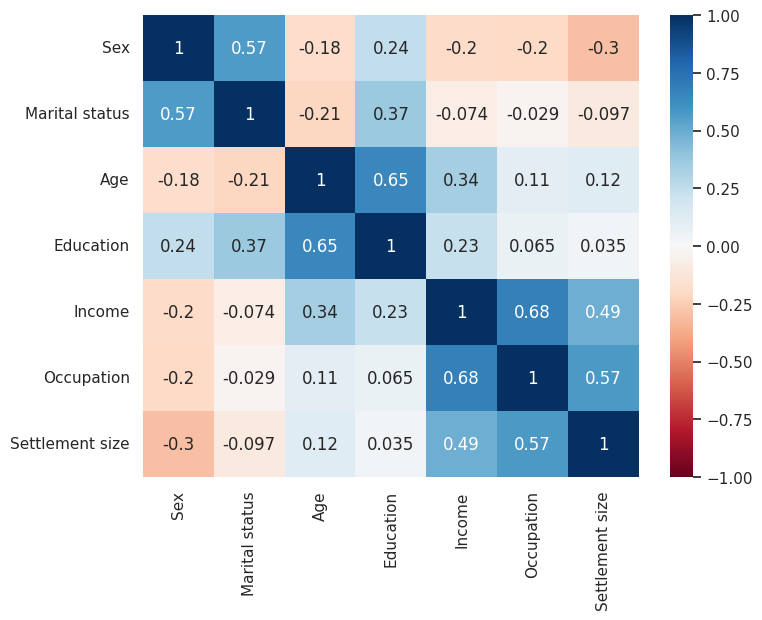

In [5]:
plt.figure(figsize=(8,6))
s = sns.heatmap(df.corr(), annot=True, cmap='RdBu',
            vmin=-1,vmax=1)
s.set_yticklabels(s.get_yticklabels(),rotation=0)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

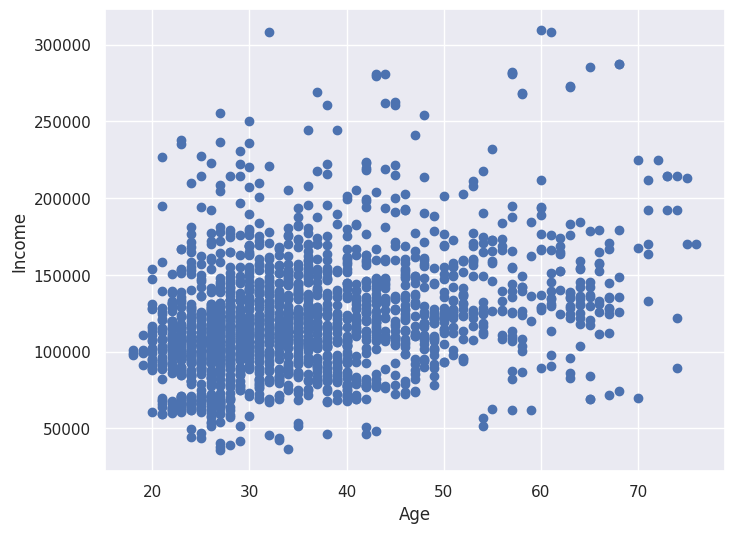

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(df['Age'],df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

**Standardization**

In [7]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)


### Hierachical Clustering

In [8]:
hier_clust = linkage(df_std, method='ward')

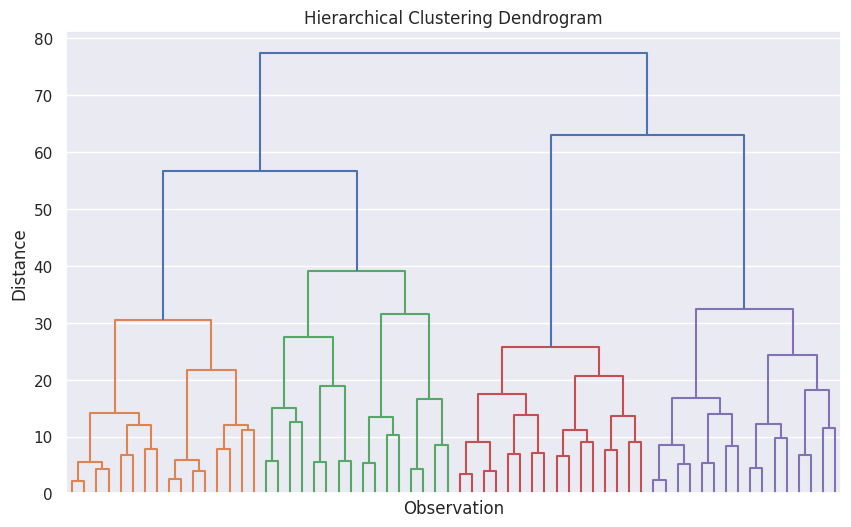

In [9]:
plt.figure(figsize = (10,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')
dendrogram(hier_clust, truncate_mode='level',
           p=5,show_leaf_counts=False, no_labels=True)
plt.show()

## KMean Clustering

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++' ,random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

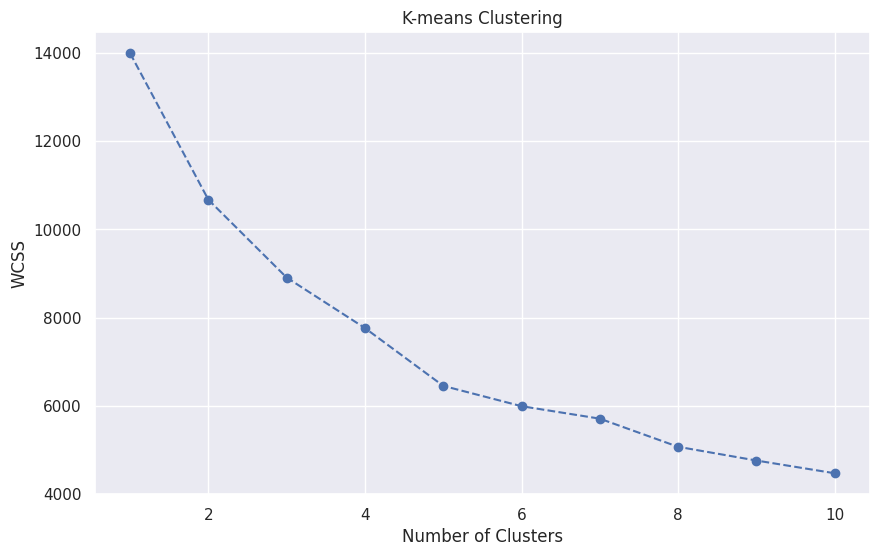

In [11]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state = 42)
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [13]:
df_segment = df.copy()
df_segment['Segment'] = kmeans.labels_

In [14]:
df_segment_analysis = df_segment.groupby(['Segment']).mean()
df_segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment,,,,,,,
0,0.066543,0.000000,33.240296,0.489834,109932.785582,0.639556,0.611830
1,0.868254,0.785714,32.928571,1.163492,98466.955556,0.384127,0.006349
2,0.691099,0.979058,29.060209,1.104712,126838.926702,1.107330,1.324607
3,0.149888,0.277405,49.192394,1.467562,160958.722595,1.364653,1.425056


0: career-focued \
1: few opportunities\
2: standard\
3: well-off

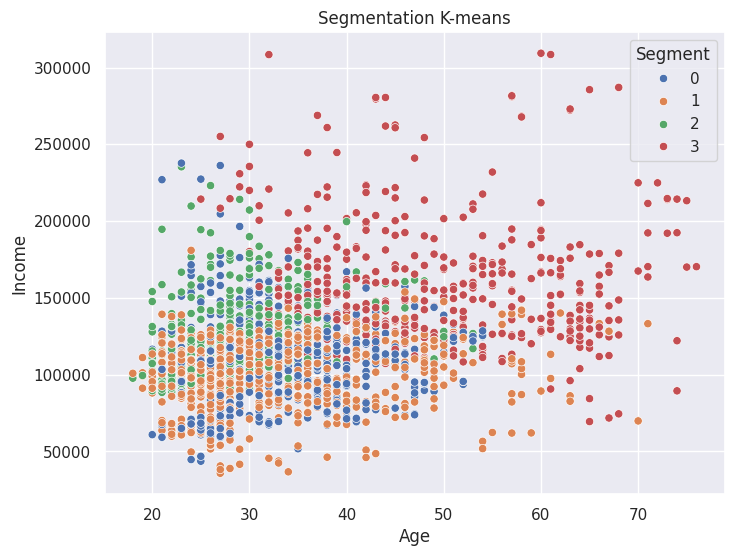

In [15]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data=df_segment, x='Age', y='Income', hue='Segment', palette='deep')
plt.title('Segmentation K-means')
plt.show()

## PCA

In [16]:
pca = PCA()
pca.fit(df_std)

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

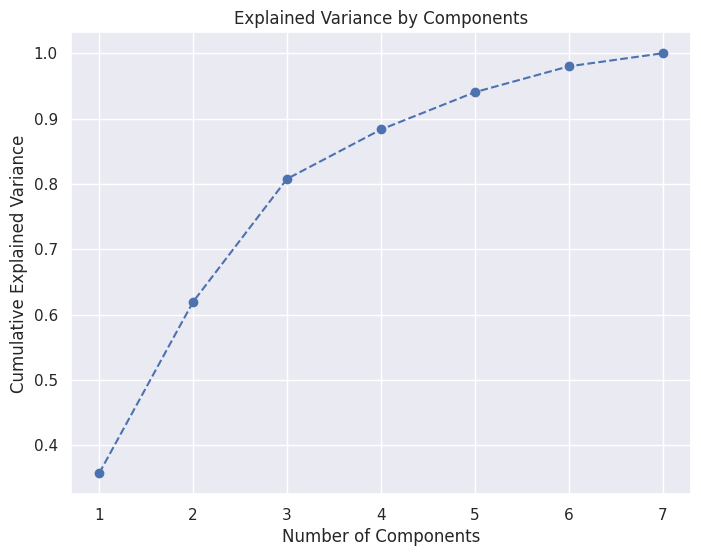

In [17]:
plt.figure(figsize = (8,6))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [18]:
pca = PCA(n_components=3)

pca.fit(df_std)

PCA(n_components=3)

In [19]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [20]:
df_pca = pd.DataFrame(data = pca.components_, columns = df.columns, index = ['CP1','CP2','CP3'])
df_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
CP1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
CP2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
CP3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x7c5f4ea552d0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

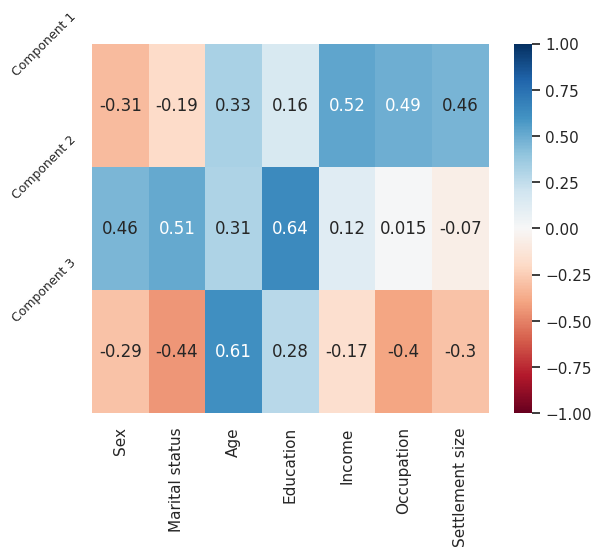

In [21]:
sns.heatmap(df_pca,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2],
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [22]:
pca_data = pca.transform(df_std)

In [23]:
km_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
km_pca.fit(pca_data)

KMeans(n_clusters=4, random_state=42)

In [24]:
pca_seg = pd.concat([df.reset_index(drop=True),pd.DataFrame(pca_data)], axis=1)
pca_seg.columns.values[-3:] = ['CP1','CP2','CP3']
pca_seg['Segment'] = km_pca.labels_

In [25]:
pca_seg.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,CP1,CP2,CP3,Segment
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,0
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,0


In [26]:
seg_analysis = pca_seg.groupby(['Segment']).mean()
seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,CP1,CP2,CP3
Segment,,,,,,,,,,
0,0.001661,0.041528,36.674419,0.684385,138482.186047,1.200997,1.255814,1.228891,-1.220013,0.041063
1,0.627869,0.454098,33.473770,0.944262,88824.154098,0.078689,0.009836,-1.607567,-0.110732,0.625678
2,0.762357,0.973384,27.889734,1.007605,119503.418251,1.055133,0.813688,-0.395592,0.518043,-1.204763
3,0.492366,0.683206,55.919847,2.129771,158400.877863,1.125954,1.099237,1.713376,2.021006,0.867641


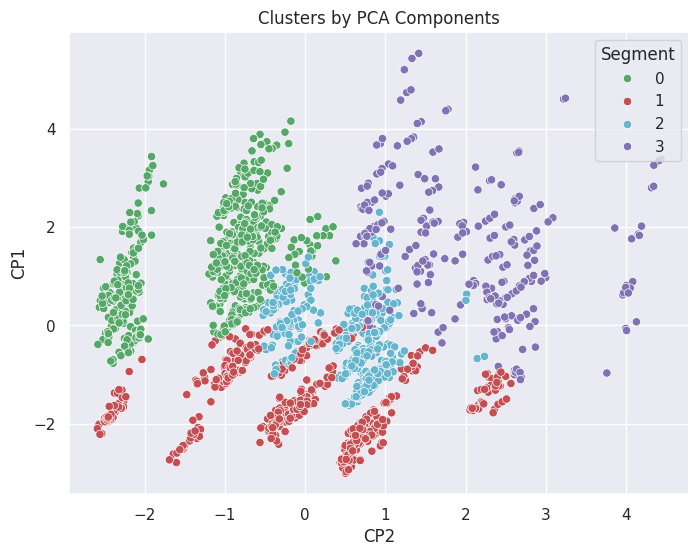

In [27]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data=pca_seg, x='CP2',y='CP1', hue='Segment', palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

In [28]:
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(pca, open('pca.pkl','wb'))
pickle.dump(km_pca, open('km_pca.pkl','wb'))
